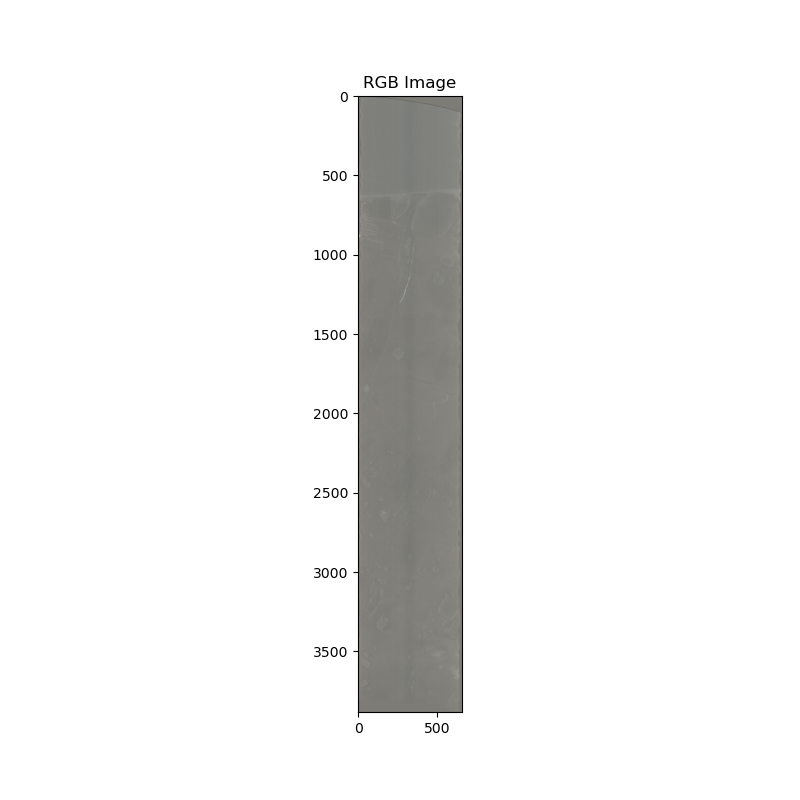

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# For Jupyter Notebook:
# %matplotlib notebook 

# For JupyterLab, use:
%matplotlib widget

# Load the hyperspectral image
img_file = 'input/ang20180812t232708rfl/ang20180812t232708_rfl_v2r2_img'  # Replace with your file path
img_open = gdal.Open(img_file)

# Function to get a band as a numpy array
def get_band(band_number):
    return img_open.GetRasterBand(band_number).ReadAsArray()

# Get the RGB bands (adjust band numbers as needed)
R_band = get_band(1)  # Band for Red
G_band = get_band(2)  # Band for Green
B_band = get_band(3)  # Band for Blue

# Set fill values (-9999) to 0
R_band[R_band == -9999] = 0
G_band[G_band == -9999] = 0
B_band[B_band == -9999] = 0

# Scale to 8-bit values
def scale_to_8bit(arr):
    arr_min, arr_max = arr.min(), arr.max()
    return ((arr - arr_min) / (arr_max - arr_min) * 255).astype('uint8')

R_scaled = scale_to_8bit(R_band)
G_scaled = scale_to_8bit(G_band)
B_scaled = scale_to_8bit(B_band)

# Create RGB stack
rgb_image = np.zeros((R_scaled.shape[0], R_scaled.shape[1], 3), dtype='uint8')
rgb_image[..., 0] = R_scaled
rgb_image[..., 1] = G_scaled
rgb_image[..., 2] = B_scaled

# Function to display pixel coordinates and values
def on_click(event):
    if event.inaxes:
        x = int(event.xdata)
        y = int(event.ydata)
        pixel_value = rgb_image[y, x]
        print(f"X: {x}, Y: {y}, Pixel Value: {pixel_value}")

# Plotting the RGB image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(rgb_image)
ax.set_title("RGB Image")
ax.set_axis_on()

# Connect the click event to the on_click function
cid = fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()
